# Random Forest Demonstration
## Overview
We are using a Random Forest Classifier to predict the volatility regimes in the markets. In short, the random forest is known as the "black box" algorithm. It constructs multiple decision trees that output a classiefier prediction and randomizes each tree to protect against overfitting of the data. The result of all the individual trees becomes our random forest prediction. 


## Vol_Data Class 

### FRED IDs with labels:

DCOILBRENTEU: European Brent Oil Prices

BAMLH0A0HYM2: US high yield index option-adjusted spread

GOLDAMGBD228NLBM: Gold fixing price in London Bullion

DAAA: Moody's corporate bond yield

RIFSPPFAAD01NB: Overnight commercial paper interest rate

BAMLHE00EHYIOAS: Euro high yield index option-adjusted spread

T10Y3M:10 year treasury bond minus 3 month treasury bond

BAMLEMFSFCRPITRIV:Emerging markets corporate bond yields

DEXCHUS: Daily China/US Exchange Rates

DEXUSEU: Daily US/EU Exchange Rates


### Other data 
GDX_Volume: Weekly Volume of the GDX etf, which tracks gold miners

SHY_Volume: Weekly Volume of the SHY etf, which is a 1-3 yr treasury bond fund

SPY_Volume: Weekly Volume of the SPY etf, representing the S&P500

In [1]:
from Code.Data.Inputs import volClass #imports volClass file which contains Vol_Data
#fred IDs to access Fred data
fred_s = ["DCOILBRENTEU","BAMLH0A0HYM2", "GOLDAMGBD228NLBM","DAAA","RIFSPPFAAD01NB","BAMLHE00EHYIOAS", "T10Y3M", "BAMLEMFSFCRPITRIV", "DEXCHUS", "DEXUSEU"]

#create vol_data object
# Vol_Data(start_date, end_date = None, fred_strings = None) Notice default for end_date and fred_strings is None
trial_vol = volClass.Vol_Data("2007-01-01", "2020-06-26", fred_strings = fred_s)

C:\Users\Vincent\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
from Code.Data import rfClass

# Regime_Predict(Vol_Data object, test_size = .3, n_estimators= 10) we chose default test data size as .3 and n_estimators for random forest as 10
trial_regime_prediction = rfClass.Regime_Predict(trial_vol)

In [3]:
trial_regime_prediction.corr

,DCOILBRENTEU,BAMLH0A0HYM2,GOLDAMGBD228NLBM,DAAA,RIFSPPFAAD01NB,BAMLHE00EHYIOAS,T10Y3M,BAMLEMFSFCRPITRIV,DEXCHUS,DEXUSEU,SPY_Volume,SHY_Volume,GDX_Volume
DCOILBRENTEU,1.000000,-0.157277,0.274688,0.277286,-0.106137,-0.032087,0.349505,-0.322899,-0.358679,0.693371,0.130487,-0.243345,-0.514960
BAMLH0A0HYM2,-0.157277,1.000000,-0.231555,0.370911,-0.284520,0.970608,0.417665,-0.579622,0.048598,0.248449,0.710897,-0.001323,-0.257475
GOLDAMGBD228NLBM,0.274688,-0.231555,1.000000,-0.725320,-0.573220,-0.173025,-0.006411,0.552956,-0.576162,-0.271010,-0.264468,0.216981,0.235443
DAAA,0.277286,0.370911,-0.725320,1.000000,0.322785,0.400015,0.440434,-0.879708,0.371674,0.747913,0.557265,-0.323795,-0.628777
RIFSPPFAAD01NB,-0.106137,-0.284520,-0.573220,0.322785,1.000000,-0.295886,-0.680422,-0.155659,0.785087,0.112192,-0.051327,-0.039432,-0.212992
BAMLHE00EHYIOAS,-0.032087,0.970608,-0.173025,0.400015,-0.295886,1.000000,0.452324,-0.622814,0.019744,0.312628,0.698997,-0.046371,-0.359939
T10Y3M,0.349505,0.417665,-0.006411,0.440434,-0.680422,0.452324,1.000000,-0.470507,-0.476126,0.474258,0.402115,-0.235223,-0.263930
BAMLEMFSFCRPITRIV,-0.322899,-0.579622,0.552956,-0.879708,-0.155659,-0.622814,-0.470507,1.000000,-0.271453,-0.782709,-0.664941,0.359546,0.728695
DEXCHUS,-0.358679,0.048598,-0.576162,0.371674,0.785087,0.019744,-0.476126,-0.271453,1.000000,0.076945,0.127969,-0.007563,-0.215082
DEXUSEU,0.693371,0.248449,-0.271010,0.747913,0.112192,0.312628,0.474258,-0.782709,0.076945,1.000000,0.467018,-0.327880,-0.735042


In [4]:
trial_regime_prediction.all_prob

,Low_Vol,Med_Vol,High_Vol
Week,,,
2007-01-08,1.0,0.0,0.0
2007-01-16,1.0,0.0,0.0
2007-01-22,1.0,0.0,0.0
2007-01-29,1.0,0.0,0.0
2007-02-05,1.0,0.0,0.0
...,...,...,...
2020-05-26,0.0,0.7,0.3
2020-06-01,0.1,0.6,0.3
2020-06-08,0.5,0.2,0.3


In [5]:
trial_regime_prediction.all_predictions_df

,Vol_Regime
Week,
2007-01-08,-1
2007-01-16,-1
2007-01-22,-1
2007-01-29,-1
2007-02-05,-1
...,...
2020-05-26,0
2020-06-01,0
2020-06-08,-1


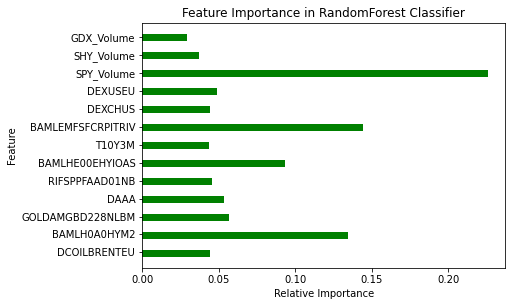

<Figure size 360x360 with 0 Axes>

Feature ranking:
1. feature 10 (0.225715)
2. feature 7 (0.144242)
3. feature 1 (0.134322)
4. feature 5 (0.093442)
5. feature 2 (0.056588)
6. feature 3 (0.053155)
7. feature 9 (0.048820)
8. feature 4 (0.045727)
9. feature 0 (0.044150)
10. feature 8 (0.044090)
11. feature 6 (0.043326)
12. feature 11 (0.036972)
13. feature 12 (0.029451)


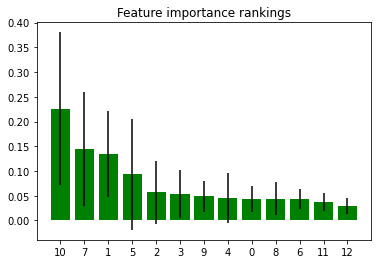

In [7]:
trial_regime_prediction.plot_feature_importances()

trial_regime_prediction.plot_feature_rankings()

This graph illustrates which of the factors we used, and the relative significance of them in our actual predictions.

In [8]:
trial_regime_prediction.classification_report()

              precision    recall  f1-score   support

          -1       0.92      0.94      0.93       138
           0       0.79      0.81      0.80        47
           1       0.95      0.81      0.88        26

    accuracy                           0.90       211
   macro avg       0.89      0.85      0.87       211
weighted avg       0.90      0.90      0.90       211



### Classification Report

Precision: TP / TP + FP -- Out of all the positive classes we have predicted correctly, how many are positive. 

Recall: TP / TP + FN -- Out of all positive classes, how much we have predicted correctly. 

f1-score: Weighted average between precision and recall scores

Support: Number of occurences of each label in the true data set. 

Macro and weighted avg look at the data holistically, and then makes the same calculations - weighted is similar to macro, but accounts for label imbalance, by taking the weighted mean of the metrics for each data label, where macro takes an unweighted mean. 


### Confusion Matrix
This visualizes the classification report, showing which were correctly predicted, as well as the False Positives and False Negatives.

Confusion Matrix: 


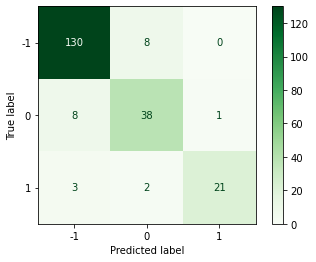

In [9]:
trial_regime_prediction.confusion_matrix()

In [10]:
trial_regime_prediction.best_params()

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished


{'n_estimators': 1200, 'max_features': 'sqrt', 'max_depth': 260}


In [16]:
optimal_regime_pred = rfClass.Regime_Predict(trial_vol, n_estimators = 1200, max_features = 'sqrt', max_depth = 260)

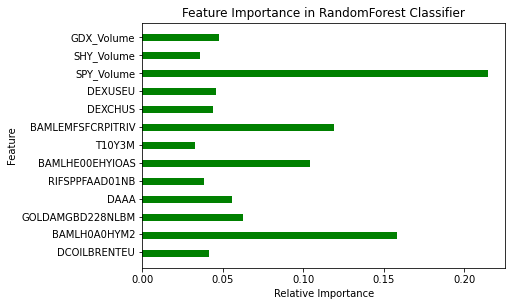

<Figure size 360x360 with 0 Axes>

Feature ranking:
1. feature 10 (0.214503)
2. feature 1 (0.158442)
3. feature 7 (0.119053)
4. feature 5 (0.104356)
5. feature 2 (0.062323)
6. feature 3 (0.055618)
7. feature 12 (0.047659)
8. feature 9 (0.046016)
9. feature 8 (0.044005)
10. feature 0 (0.041208)
11. feature 4 (0.038457)
12. feature 11 (0.035680)
13. feature 6 (0.032680)


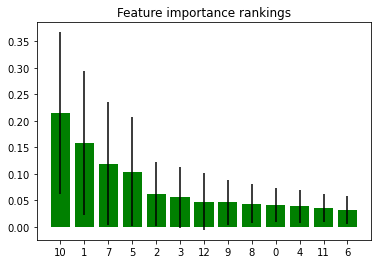

In [17]:
optimal_regime_pred.plot_feature_importances()
optimal_regime_pred.plot_feature_rankings()

In [18]:
optimal_regime_pred.classification_report()

              precision    recall  f1-score   support

          -1       0.90      0.94      0.92       137
           0       0.67      0.73      0.70        44
           1       0.90      0.60      0.72        30

    accuracy                           0.85       211
   macro avg       0.82      0.76      0.78       211
weighted avg       0.85      0.85      0.85       211



Confusion Matrix: 


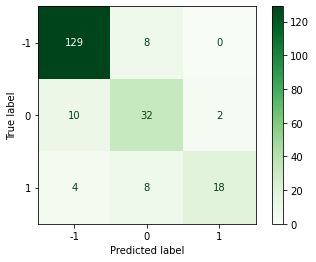

In [19]:
optimal_regime_pred.confusion_matrix()